In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.neighbors import KernelDensity
sns.set_context('talk')
from scipy.integrate import simpson, trapezoid
import numpy as np

import scipy.interpolate as interpolate
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
from scipy import integrate
import scipy.stats as ss

In [11]:
import riskModelValuation as model

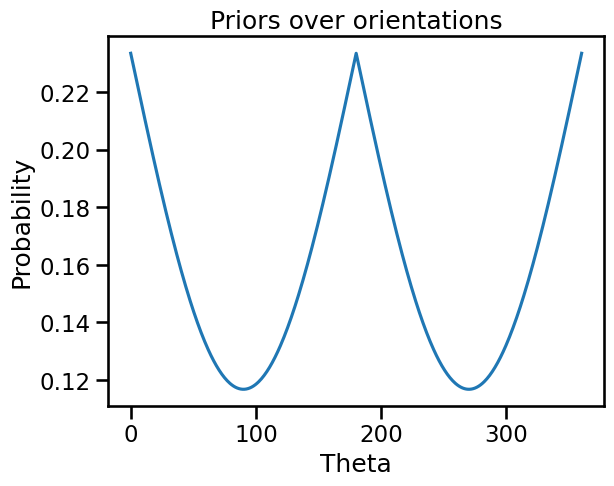

In [12]:
plt.plot(model.stim_grid*180.0/np.pi, model.prior_ori(model.stim_grid))
plt.xlabel("Theta")
plt.ylabel("Probability")
plt.title("Priors over orientations")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

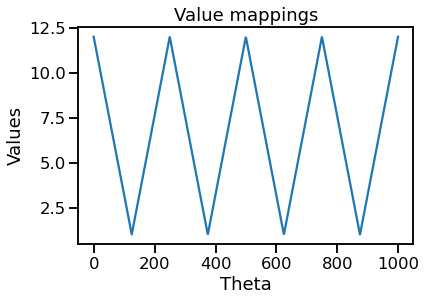

In [ ]:
plt.plot(model.value_function_ori(model.stim_grid, "linearPrior"))
plt.xlabel("Theta")
plt.ylabel("Values")
plt.title("Value mappings")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

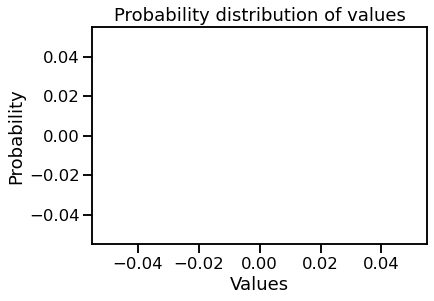

In [16]:
bin_centers, ps = model.prior_val(model.stim_grid, "linearPrior")
# model.ori_to_val_dist(model.stim_grid, model.prior_ori(model.stim_grid), "linearPrior")
plt.xlabel("Values")
plt.ylabel("Probability")
plt.title("Probability distribution of values")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")
plt.plot(ps[:-1])

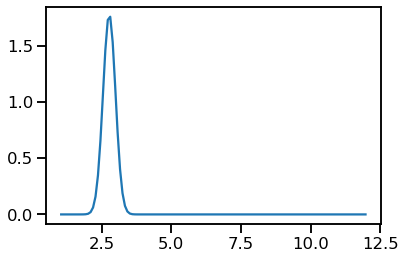

In [17]:
theta0 = 0.21*np.pi# np.linspace(0.001*np.pi, 0.25*np.pi, 3)
val_noise = model.stimulus_val_noise(x = theta0, sd = 0.005*np.pi, grid = model.stim_grid, type = "linearPrior")
plt.plot(model.prior_val(model.stim_grid, "linearPrior")[0], val_noise[0])
# plt.plot(model.prior_val(model.stim_grid, "linearPrior")[0], val_noise[1])
# plt.plot(model.prior_val(model.stim_grid, "linearPrior")[0], val_noise[2])

# plt.xlabel("Value of orientations")
# plt.ylabel("Probability distribution")
# plt.title(["Value distribution: input $\theta$=", round(theta0*180.0/np.pi, 3)])
# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")
# np.shape(val_noise)
# np.shape(model.prior_val(model.stim_grid, "linearPrior")[0])

In [18]:
theta0 = 0.2# [0.2, 0.3, 0.5]
type = "linearPrior"
sigma_stim = 0.01*np.pi
sigma_rep = 0.001
val_centers, val_prior = model.prior_val(model.stim_grid, type)
p_val_given_theta0 = model.stimulus_val_noise(theta0, sigma_stim, model.stim_grid, type)
p_m_given_val0 = model.sensory_noise(model.cdf_val(type)[np.newaxis, :, np.newaxis], sigma_rep, model.rep_grid[np.newaxis, np.newaxis, :])

# np.shape(val_prior)
# np.shape(p_val_given_theta0)
np.shape(p_m_given_val0)

(1, 125, 300)

In [19]:
grid = np.array(model.stim_grid)
dgrid = grid[1:] - grid[:-1]
np.shape(np.append(dgrid, dgrid[1]))

(1000,)

In [20]:
x = 0.45*np.pi#np.linspace(0.001, 0.25*np.pi, 3)
sd = 0.02
grid = model.stim_grid
type = "linearPrior"

if np.isscalar(x):
    x = np.array([x])
else:
    x = np.array(x)
    

p = ss.vonmises(loc=x, kappa=1/sd**2).pdf(model.stim_grid)


if p.ndim == 1:
    p_dist = p[np.newaxis, :]
    grid = grid[np.newaxis, :]
else:
    p_dist = p
    
p_dist = np.array(p_dist)
grid = np.array(grid)
# Till here just trying to make it general for different input dimensions.

# For every bin in x_stim, calculate the probability mass within that bin
# Using ellipsis (...) here since, we will have the grid and the p_mass in the last dimension anyway.
dgrid = grid[..., 1:] - grid[..., :-1]
p_mass = ((p_dist[..., 1:] + p_dist[..., :-1]) / 2) * dgrid
dgrid = np.append(dgrid, dgrid[0,1])
p_mass = np.append(p_mass, p_mass[0,-1])

np.shape(p_mass)
# Get the center of every bin in value functional space.
grid_value = model.value_function_ori(grid[..., :] + dgrid / 2., type)


arranged_valGrid = np.sort(grid_value)
arrangedIndex = np.argsort(grid_value)#, return_index=True, return_counts=True)
arrangedIndex
p_mass = p_mass[..., arrangedIndex]
# np.shape(p_mass)
means_grid = np.mean(arranged_valGrid.reshape(-1, 8), axis=1)
# means_grid

means_prob = np.mean(p_mass.reshape(-1, 8), axis=1)

means_prob_dist = interpolate.interp1d(np.squeeze(means_grid), means_prob)
means_prob = means_prob_dist(means_grid)

ps = []
for ix in range(len(p_dist)):
    val_dist = interpolate.interp1d(np.squeeze(means_grid), means_prob)
    h, edges = np.histogram(np.squeeze(means_grid), bins=200, weights=means_prob[:], density=True)
    bin_centers = (edges[1:] + edges[:-1]) / 2
    val_dist = val_dist(np.squeeze(bin_centers))
    val_dist = val_dist / trapezoid(val_dist, bin_centers)
    ps.append(val_dist)
ps = np.squeeze(np.array(ps))
bin_centers = (edges[1:] + edges[:-1]) / 2

np.shape(p_mass)
# plt.plot(means_grid, means_prob)
# plt.plot(ps)
# val_dist
# np.shape(val_dist)
# plt.plot(bin_centers, ps)
# plt.plot(val_dist(np.squeeze(bin_centers)))
# plt.plot(np.squeeze(grid_value))
# plt.plot(np.squeeze(p_mass))
# plt.plot(np.squeeze(grid_value)[1:100], np.squeeze(p_mass)[1:100])

(1, 1000)

In [21]:
theta0 = 0.38*np.pi#np.linspace(0.001, 0.25*np.pi, 3)
sigma_stim = 0.005*np.pi
sigma_rep = 0.01
    
p_m_given_val0, p_m_given_val = model.value_efficient_encoding(theta0, sigma_stim, sigma_rep, type = "linearPrior")
# plt.plot(model.rep_grid,p_m_given_val0[0,:])
plt.plot(model.rep_grid,p_m_given_val[50,:])
np.shape(p_m_given_val)

TypeError: list indices must be integers or slices, not tuple

In [9]:
np.shape(model.stimulus_val_noise(model.stim_grid, sigma_stim, model.stim_grid, "linearPrior")[..., np.newaxis] * \
        model.sensory_noise(model.cdf_val("linearPrior")[np.newaxis, :, np.newaxis], sigma_rep, model.rep_grid[np.newaxis, np.newaxis, :]))

(1000, 125, 300)

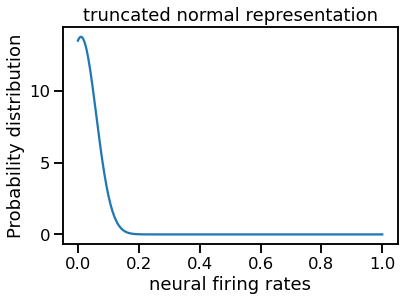

In [10]:
loc = 0.01
scale = 0.05
plt.plot(model.rep_grid, ss.truncnorm.pdf(model.rep_grid,(0.0 - loc) / scale, (1.0 - loc) / scale, loc, scale))
plt.xlabel("neural firing rates")
plt.ylabel("Probability distribution")
plt.title("truncated normal representation")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

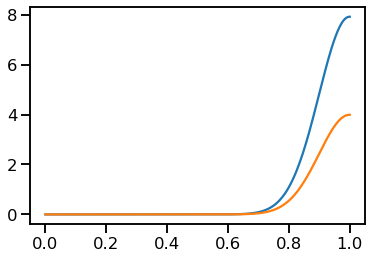

In [11]:
m = 0.999
sd = 0.1
plt.plot(model.rep_grid,ss.truncnorm.pdf(model.rep_grid, (0 - m) / sd, (1 - m) / sd, m, sd))
plt.plot(model.rep_grid,ss.foldnorm.pdf(model.rep_grid, [(1./sd)*(m)], 0, sd))

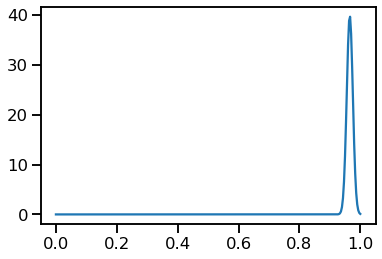

In [12]:
m = 0.99
sd = 0.01
plt.plot(model.rep_grid, ss.norm.pdf(model.rep_grid, m+5*sd*(0.5-m), sd))

In [17]:
theta0 = 0.23*np.pi#np.linspace(0.001, 0.25*np.pi, 3)
sigma_stim = 0.01*np.pi
sigma_rep = 0.01
    
p_m_given_val0, p_m_given_val = model.value_efficient_encoding(theta0, sigma_stim, sigma_rep, type = "linearPrior")

p_val_given_m = p_m_given_val * np.array(model.prior_val(model.stim_grid, type = "linearPrior")[1])[:, np.newaxis]
# p_val_given_m = p_m_given_val * np.array(model.prior_ori(model.stim_grid))[:, np.newaxis]
np.shape(p_val_given_m)
p_val_given_m = p_val_given_m / trapezoid(p_val_given_m, model.stim_grid, axis=0)[np.newaxis, :]

# p_value_est_given_val0 = p_m_given_val0[:, np.newaxis, :] * p_val_given_m[np.newaxis, ...]
# p_value_est_given_val0 = trapezoid(p_value_est_given_val0, model.rep_grid, axis=2)
# val, p_value_est_given_val0 = model.ori_to_val_dist(model.stim_grid, p_value_est_given_val0, type = "linearPrior")

# # plt.plot(model.rep_grid,p_m_given_val0[0,:])
# np.shape(p_m_given_val)#*np.array(model.prior_val(model.stim_grid, "linearPrior")[1])[:, np.newaxis])
# # np.shape(model.prior_val(model.stim_grid, "linearPrior")[1])
# # plt.plot(val, p_value_est_given_val0)

(125, 300)

In [ ]:
type = "linearPrior"
p_val_given_theta0 = model.stimulus_val_noise(theta0, sigma_stim, model.stim_grid, type)
p_m_given_val0 = model.sensory_noise(model.cdf_val(type)[np.newaxis, :, np.newaxis], sigma_rep, model.rep_grid[np.newaxis, np.newaxis, :])
p_m_given_val0 = p_m_given_val0 * p_val_given_theta0[..., np.newaxis]
val_centers, val_prior = model.prior_val(model.stim_grid, "linearPrior")
p_m_given_val0 = trapezoid(p_m_given_val0, val_centers, axis=1)
np.shape(p_m_given_val0)

p_m_given_val = model.stimulus_val_noise(model.stim_grid, sigma_stim, model.stim_grid, type)[..., np.newaxis] * \
        model.sensory_noise(model.cdf_val(type)[np.newaxis, :, np.newaxis], sigma_rep, model.rep_grid[np.newaxis, np.newaxis, :])

np.shape(p_m_given_val)

# Integrate out the realized values
p_m_given_val = trapezoid(p_m_given_val, model.stim_grid, axis=0)

np.shape(p_m_given_val)

In [ ]:
# np.shape(np.array(model.prior_val(model.stim_grid, type = "linearPrior")))
# np.shape(p_m_given_val * np.array(model.prior_val(model.stim_grid, type = "linearPrior")[1])[:, np.newaxis])
# np.shape(p_m_given_val)
# np.shape(np.array(model.prior_val(model.stim_grid, type = "linearPrior")[1])[:, np.newaxis])
# plt.plot((p_m_given_val * np.array(model.prior_val(model.stim_grid, type = "linearPrior")[1])[:, np.newaxis])[50,:])
# p_val_given_m = p_m_given_val * np.array(model.prior_val(model.stim_grid, type = "linearPrior")[1])[:, np.newaxis]
# p_val_given_m = p_m_given_val * np.array(model.prior_ori(model.stim_grid))[:, np.newaxis]

plt.plot(p_val_given_m[0,:])
plt.plot(p_val_given_m[5,:])
# plt.plot(p_val_given_m[99,:])
plt.plot(p_val_given_m[10,:])
plt.plot(p_val_given_m[15,:])
plt.plot(p_val_given_m[60,:])
# plt.plot(p_m_given_val[10])

# DEFINING PARAMETERS


/Users/sbedi/git/Information-and-Value/encoding_decoding/riskModelValuation.py:199: RuntimeWarning: invalid value encountered in true_divide
  p_val_given_m = p_val_given_m / trapezoid(p_val_given_m, stim_grid, axis=0)[np.newaxis, :]


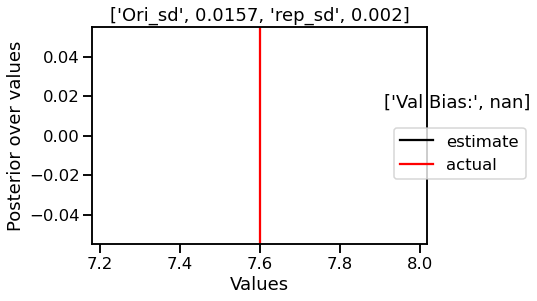

In [29]:
theta0 = 0.1*np.pi#np.linspace(0.001, 0.25*np.pi, 3)
sigma_stim = 0.005*np.pi
sigma_rep = 0.002
type = "linearPrior"

val_centers, p_value_est_given_val0  = model.value_bayesian_decoding(theta0, sigma_stim, sigma_rep, type)

expectedEstimate = trapezoid(val_centers*p_value_est_given_val0, val_centers)
expectedEstimate

plt.plot(val_centers, p_value_est_given_val0)
plt.axvline(expectedEstimate, color = "k", label = "estimate")
plt.axvline(model.value_function_ori(theta0, type), color = "r", label = "actual")
b = round(expectedEstimate-model.value_function_ori(theta0, type),3)
plt.legend(loc=[0.9, 0.3])
plt.figtext(0.8, 0.6, ["Val Bias:",b], fontdict=None)
plt.xlabel("Values")
plt.ylabel("Posterior over values")
plt.title(["Ori_sd", round(sigma_stim, 4), "rep_sd", round(sigma_rep, 4)])
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

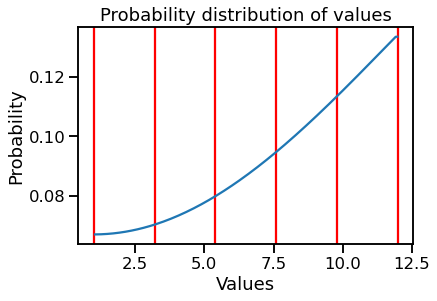

In [15]:
t = model.value_function_ori(np.linspace(0.25, 0.5, 6)*np.pi, "linearPrior")
plt.axvline(t[0], color = "r", label = "actual")
plt.axvline(t[1], color = "r", label = "actual")
plt.axvline(t[2], color = "r", label = "actual")
plt.axvline(t[3], color = "r", label = "actual")
plt.axvline(t[4], color = "r", label = "actual")
plt.axvline(t[5], color = "r", label = "actual")
plt.plot(model.prior_val(model.stim_grid, "linearPrior")[0], model.prior_val(model.stim_grid, "linearPrior")[1])
plt.xlabel("Values")
plt.ylabel("Probability")
plt.title("Probability distribution of values")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

In [16]:
model.value_function_ori(np.linspace(0.25, 0.5, 6)*np.pi, "linearPrior")

array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. ])

In [17]:
risk_prob=0.75
sigma_stim = 0.005*np.pi
sigma_rep = 0.01
type = "linearPrior"

if type == "linearPrior":
    rangeOri = np.linspace(59./180., 70./180., 12)*np.pi
    
elif type == "inverseLinearPrior":
    rangeOri = np.linspace(7./180., 14./180., 8)*np.pi

safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
#     p_chose_risky = model.diff_dist(safe_value, safe_prob, risky_prob)
# p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
np.shape(safe_value)

(200,)

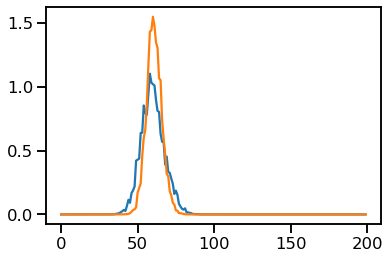

In [18]:
plt.plot(safe_prob)
plt.plot(risky_prob[int((len(rangeOri))/2),:])

In [19]:
cdf2 = integrate.cumtrapz(safe_prob, safe_value, initial=0.0, axis=0)
np.shape(risky_prob)
# np.shape(cdf2)
# np.shape(risky_prob*cdf2)

(12, 200)

In [20]:
prob = risky_prob*cdf2
# p.append(prob)
integrate.trapz(prob, safe_value)

array([0.01772464, 0.06302381, 0.09545534, 0.15516975, 0.33156453,
       0.45458726, 0.54741605, 0.71106091, 0.82832661, 0.87984208,
       0.92989319, 0.97207693])

In [21]:
model.diff_dist(safe_value, risky_prob, safe_prob)

array([[0.01772464, 0.06302381, 0.09545534, 0.15516975, 0.33156453,
        0.45458726, 0.54741605, 0.71106091, 0.82832661, 0.87984208,
        0.92989319, 0.97207693]])

# linear prior

In [18]:

high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001



In [21]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"   
    
    risky_rep = 1.0*sigma_rep

    # Getting all the values from actual transformation
    rangeOri = np.linspace(22.5/180., 13/180., 11)*np.pi
    val_range = model.value_function_ori(rangeOri, type)
    safeVal = val_range[0]
    riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)
    
    # getting inferred values
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, risky_rep , risk_prob, type)
    
    # Risk attitudes
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

    # The value of the safe option
    plt.axvline(safeVal, c='r', ls='--')
    # Where the risky option value is the same as the safe option value,
    # the probability of chosing should have been 0.5 i there were no biases at all.
    plt.axhline(0.5, c='k', ls='--')
#     plt.ylim(0.45,0.55)
    
    # Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
    # and whether it is equal to the actual rational equilibrium that would have been without biases.
    plt.plot(riskyVal_range, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    

    
    plt.xlabel("Value of risky option")
    plt.ylabel("Prob of chosing risky option")
    plt.title("Value Function - " + type)

In [22]:
interact(plot_riskAttitudes, sigma_stim = (low_stim_noise, high_stim_noise, 0.004*1.99*np.pi), sigma_rep = (low_rep_noise, high_rep_noise, 0.002))



interactive(children=(FloatSlider(value=0.031258846903218444, description='sigma_stim', max=0.0875247713290116…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

# Inverse Linear prior

In [ ]:

high_stim_noise = 0.014*1.99*np.pi
low_stim_noise = 0.001*1.99*np.pi
high_rep_noise = 0.014
low_rep_noise = 0.001



In [24]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"   
    
    risky_rep = 1.0*sigma_rep

    # Getting all the values from actual transformation
    rangeOri = np.linspace(13/180., 22.5/180., 11)*np.pi
    val_range = model.value_function_ori(rangeOri, type)
    safeVal = val_range[0]
    riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)
    
    # getting inferred values
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, risky_rep , risk_prob, type)
    
    # Risk attitudes
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

    # The value of the safe option
    plt.axvline(safeVal, c='r', ls='--')
    # Where the risky option value is the same as the safe option value,
    # the probability of chosing should have been 0.5 i there were no biases at all.
    plt.axhline(0.5, c='k', ls='--')
#     plt.ylim(0.45,0.55)
    
    # Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
    # and whether it is equal to the actual rational equilibrium that would have been without biases.
    plt.plot(riskyVal_range, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    

    
    plt.xlabel("Value of risky option")
    plt.ylabel("Prob of chosing risky option")
    plt.title("Value Function - " + type)

In [25]:
interact(plot_riskAttitudes, sigma_stim = (low_stim_noise, high_stim_noise, 0.004*1.99*np.pi), sigma_rep = (low_rep_noise, high_rep_noise, 0.002))




interactive(children=(FloatSlider(value=0.031258846903218444, description='sigma_stim', max=0.0875247713290116…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

# More linear prior

In [22]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"
        
    rangeOri = np.linspace(48./180., 52./180., 5)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
#     p_chose_risky = model.diff_dist(safe_value, safe_prob, risky_prob)
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        
    rangeOri = np.linspace(52./180., 59./180., 8)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
#     p_chose_risky = model.diff_dist(safe_value, safe_prob, risky_prob)
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    rangeOri = np.linspace(59./180., 70./180., 12)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
#     p_chose_risky = model.diff_dist(safe_value, safe_prob, risky_prob)
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    

    rangeOri = np.linspace(71./180., 88./180., 18)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
#     p_chose_risky = model.diff_dist(safe_value, safe_prob, risky_prob)
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    
    
    plt.xlabel("orientation of risky option")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - linearPrior")

In [23]:
interact(plot_riskAttitudes, sigma_stim = ((0.1/180.0)*np.pi, (5./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (5./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.043633231299858244, description='sigma_stim', max=0.0872664625997164…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [24]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"

#     rangeOri = np.linspace(48./180., 52./180., 5)*np.pi
#     safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
#     risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
#     p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
#     safeVal = model.value_function_ori(rangeOri[0], type)
#     riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
#     plt.axvline(0, c='k', ls='--')
#     plt.axhline(0.5, c='k', ls='--')
#     plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(52./180., 59./180., 8)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(59./180., 70./180., 12)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


#     rangeOri = np.linspace(71./180., 88./180., 18)*np.pi
#     safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
#     risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
#     p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
#     safeVal = model.value_function_ori(rangeOri[0], type)
#     riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
#     plt.axvline(0, c='k', ls='--')
#     plt.axhline(0.5, c='k', ls='--')
#     plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - linear Prior")

In [25]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.1/180.0)*np.pi, (5./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (5./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.043633231299858244, description='sigma_stim', max=0.0872664625997164…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>

In [26]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"
        
    rangeOri = np.linspace(3./180., 7./180., 5)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        
    rangeOri = np.linspace(7./180., 14./180., 8)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    rangeOri = np.linspace(14./180., 26./180., 12)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    

    rangeOri = np.linspace(26./180., 43./180., 18)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    
    
    plt.xlabel("orientation of risky option")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverseLinearPrior")

In [27]:
interact(plot_riskAttitudes, sigma_stim = ((0.1/180.0)*np.pi, (5./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (5./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.043633231299858244, description='sigma_stim', max=0.0872664625997164…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [28]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"

#     rangeOri = np.linspace(3./180., 7./180., 5)*np.pi
#     safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
#     risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
#     p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
#     safeVal = model.value_function_ori(rangeOri[0], type)
#     riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
#     plt.axvline(0, c='k', ls='--')
#     plt.axhline(0.5, c='k', ls='--')
#     plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(7./180., 14./180., 8)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(14./180., 26./180., 12)*np.pi
    safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


#     rangeOri = np.linspace(26./180., 43./180., 18)*np.pi
#     safe_value, safe_prob = model.value_bayesian_decoding(rangeOri[0], sigma_stim, sigma_rep , type)
#     risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_rep , risk_prob, type) 
#     p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
#     safeVal = model.value_function_ori(rangeOri[0], type)
#     riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
#     plt.axvline(0, c='k', ls='--')
#     plt.axhline(0.5, c='k', ls='--')
#     plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverse linear Prior")

In [29]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.1/180.0)*np.pi, (5./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (5./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.043633231299858244, description='sigma_stim', max=0.0872664625997164…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>